<a href="https://colab.research.google.com/github/binhnhu1409/Nhu_python_journey/blob/main/exploratory_data_python_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#1 Load the dataset as a Pandas DataFrame.
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_Carvana_dataset_smallv.csv')
df.head(10)

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,PRIMEUNIT,AUCGUART,VehBCost
0,0,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,NaN,NaN,7100.0
1,0,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,NaN,NaN,7600.0
2,0,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,NaN,NaN,4900.0
3,0,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,NaN,NaN,4100.0
4,0,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,NaN,NaN,4000.0
5,0,ADESA,5,MITSUBISHI,WHITE,AUTO,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,3901.0,4908.0,6706.0,NaN,NaN,5600.0
6,0,ADESA,5,KIA,BLACK,AUTO,Covers,65328,OTHER ASIAN,MEDIUM,OTHER,2966.0,4038.0,6240.0,NaN,NaN,4200.0
7,0,ADESA,4,FORD,WHITE,AUTO,Covers,65805,AMERICAN,MEDIUM,FORD,3313.0,4342.0,6667.0,NaN,NaN,4500.0
8,0,ADESA,2,KIA,BLACK,AUTO,Covers,49921,OTHER ASIAN,MEDIUM,OTHER,6196.0,7274.0,9687.0,NaN,NaN,5600.0
9,0,ADESA,2,FORD,RED,AUTO,Alloy,84872,AMERICAN,LARGE,FORD,7845.0,9752.0,11734.0,NaN,NaN,7700.0


In [3]:
#2 Check all column names with their data types. Modify the data type of features if needed.
df = df.convert_dtypes()
df.IsBadBuy = df.IsBadBuy.astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           72983 non-null  object 
 1   Auction                            72983 non-null  string 
 2   VehicleAge                         72983 non-null  Int64  
 3   Make                               72983 non-null  string 
 4   Color                              72975 non-null  string 
 5   Transmission                       72974 non-null  string 
 6   WheelType                          69809 non-null  string 
 7   VehOdo                             72983 non-null  Int64  
 8   Nationality                        72978 non-null  string 
 9   Size                               72978 non-null  string 
 10  TopThreeAmericanName               72978 non-null  string 
 11  MMRAcquisitionAuctionAveragePrice  72965 non-null  Int

In [4]:
#3 there is no Refid feature in the giving dataset though
# but I can eliminate it from Data Frame by using the following code:
# df.drop(labels=['Refid'], axis=1, inplace = True)

In [5]:
#4 Extract Descriptive statistics of each feature of the dataset
import numpy as np
df.describe()
df.describe(include=np.object)

,IsBadBuy
count,72983
unique,2
top,0
freq,64007


In [6]:
#5 Correct the incorrect values and categories in case there exists any.
df.Transmission.value_counts()
df.Transmission.replace({'Manual': 'MANUAL'}, inplace= True)
df.Transmission.value_counts()

AUTO      70398
MANUAL     2576
Name: Transmission, dtype: int64

In [7]:
#7 Handle missing values
df.shape
df.isnull().sum()
round(df.isnull().sum()/72983, ndigits=2)


IsBadBuy                             0.00
Auction                              0.00
VehicleAge                           0.00
Make                                 0.00
Color                                0.00
Transmission                         0.00
WheelType                            0.04
VehOdo                               0.00
Nationality                          0.00
Size                                 0.00
TopThreeAmericanName                 0.00
MMRAcquisitionAuctionAveragePrice    0.00
MMRAcquisitionAuctionCleanPrice      0.00
MMRAcquisitionRetailAveragePrice     0.00
PRIMEUNIT                            0.95
AUCGUART                             0.95
VehBCost                             0.00
dtype: float64

In [8]:
#7 continued
df.dropna(subset = ['Color', 'Transmission','Nationality','Size','TopThreeAmericanName'], inplace= True)
df.dropna(subset= ['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice'], inplace= True)
df.dropna(subset = ['WheelType'], inplace= True)
df.drop(labels=['PRIMEUNIT','AUCGUART'], axis=1, inplace= True)

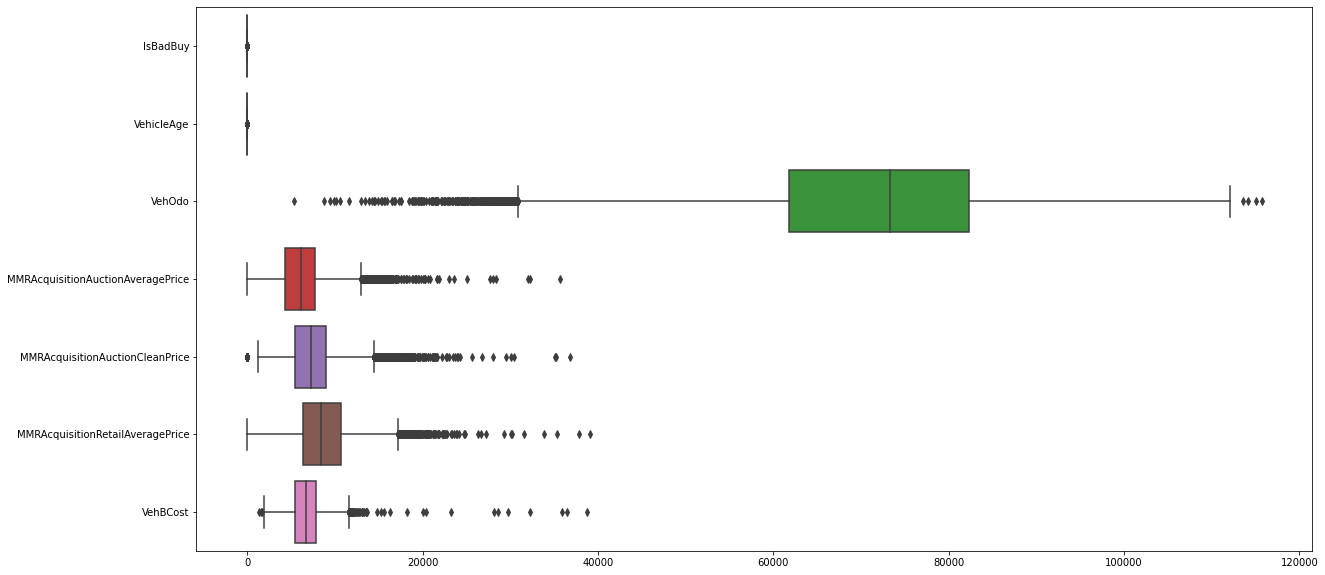

In [9]:
#6 Do outlier detection
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (20,10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(data=df, orient= "h", whis=1.5)

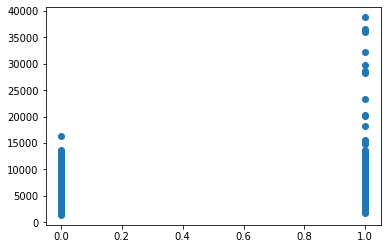

In [10]:
#6 another try
plt.scatter(df.IsBadBuy, df.VehBCost)

In [11]:
#8 Compute the average of the ‘VehBcost’ feature.
df.VehBCost.mean()

6744.02911700222

In [12]:
#9 By using .query method, retrieve a table with contains green medium-size cars
df.Size.value_counts()
df.Color.value_counts()
df.query('Color=="GREEN" and Size=="MEDIUM"')

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,VehBCost
90,0,ADESA,6,NISSAN,GREEN,AUTO,Covers,65379,TOP LINE ASIAN,MEDIUM,OTHER,4704,5612,7671,7700.0
129,0,ADESA,4,PONTIAC,GREEN,AUTO,Alloy,70741,AMERICAN,MEDIUM,GM,7146,8382,10398,6900.0
150,0,ADESA,6,CHRYSLER,GREEN,AUTO,Alloy,87775,AMERICAN,MEDIUM,CHRYSLER,3667,4575,7778,4600.0
165,0,ADESA,4,FORD,GREEN,AUTO,Alloy,85042,AMERICAN,MEDIUM,FORD,4872,5998,8066,4600.0
202,0,ADESA,6,CHEVROLET,GREEN,AUTO,Alloy,94011,AMERICAN,MEDIUM,GM,4759,6083,7680,5900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72690,0,ADESA,3,PONTIAC,GREEN,AUTO,Alloy,86549,AMERICAN,MEDIUM,GM,9261,10983,10502,7500.0
72692,0,ADESA,2,PONTIAC,GREEN,AUTO,Alloy,74194,AMERICAN,MEDIUM,GM,7766,8815,8887,7100.0
72796,0,ADESA,6,OLDSMOBILE,GREEN,AUTO,Covers,71544,AMERICAN,MEDIUM,GM,2880,4195,3610,4000.0
72803,0,ADESA,4,CHRYSLER,GREEN,AUTO,Alloy,82086,AMERICAN,MEDIUM,CHRYSLER,3827,5054,4633,5350.0


In [13]:
#10 Compute the average price (‘VehBcost’) for each classes in the ‘Make’ feature.
df.groupby('Make').groups.keys()
Make_classes = df.groupby('Make')
Make_classes['VehBCost'].mean()

Make
ACURA            9020.862069
BUICK            6189.681351
CADILLAC         9900.333333
CHEVROLET        6846.356212
CHRYSLER         6521.288621
DODGE            7061.036844
FORD             6410.273339
GMC              8343.479200
HONDA            8424.264392
HUMMER          11920.000000
HYUNDAI          5975.887821
INFINITI         9610.058947
ISUZU            7622.442748
JEEP             7932.846296
KIA              5994.136556
LEXUS           13066.761667
LINCOLN          7680.217391
MAZDA            7056.866254
MERCURY          6243.645714
MINI             8560.208333
MITSUBISHI       6648.827479
NISSAN           7815.573966
OLDSMOBILE       4456.551724
PLYMOUTH         3350.000000
PONTIAC          6609.870281
SATURN           5621.176214
SCION            7432.455645
SUBARU           9035.192308
SUZUKI           5377.491613
TOYOTA           8356.237768
TOYOTA SCION     5560.000000
VOLKSWAGEN       7833.984375
VOLVO            9756.081081
Name: VehBCost, dtype: float64

In [14]:
#11 Use Pandas .crosstab method to investigate the percentage of each of good buy and Bad buy classes (the feature ‘IsBadBuy’ ) in each ‘Nationality’ class.
pd.crosstab(df.Nationality, df.IsBadBuy, margins= True)
pd.crosstab(df.Nationality, df.IsBadBuy, margins= True, normalize=0 )

IsBadBuy,0,1
Nationality,,
AMERICAN,0.904366,0.095634
OTHER,0.878307,0.121693
OTHER ASIAN,0.901011,0.098989
TOP LINE ASIAN,0.894870,0.105130
All,0.903446,0.096554


In [15]:
# 12 Use Pandas .crosstab to see if the vehicle's odometer can affect the buyer's satisfaction or dissatisfaction with its purchases. 

#grouping odometer values to a new column
df['new_VehOdo'] = round(df.VehOdo/10000)*10000
pd.crosstab(df.new_VehOdo, df.IsBadBuy ,margins=True, normalize=0)

IsBadBuy,0,1
new_VehOdo,,
10000.0,0.600000,0.400000
20000.0,0.908163,0.091837
30000.0,0.938931,0.061069
40000.0,0.951238,0.048762
50000.0,0.946628,0.053372
60000.0,0.918642,0.081358
70000.0,0.909251,0.090749
80000.0,0.890549,0.109451
90000.0,0.873496,0.126504


In [16]:
# Do similar investigation for features ‘Make’, ‘Color’, ‘Transmission’ and ‘Auction’ features.
pd.crosstab(df.Make, df.IsBadBuy, margins= True,normalize=0)
pd.crosstab(df.Color, df.IsBadBuy, margins= True,normalize=0)
pd.crosstab(df.Transmission, df.IsBadBuy, margins= True,normalize=0)
pd.crosstab(df.Auction, df.IsBadBuy, margins= True,normalize=0)

IsBadBuy,0,1
Auction,,
ADESA,0.913558,0.086442
MANHEIM,0.889619,0.110381
OTHER,0.929285,0.070715
All,0.903446,0.096554


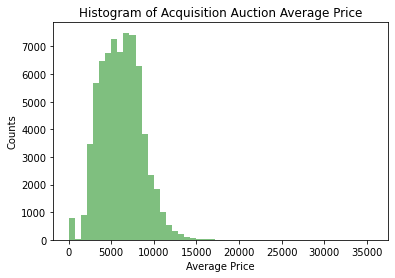

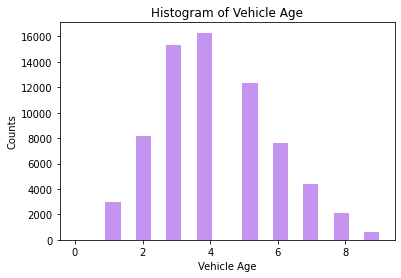

In [17]:
#13 Create histogram plot of 'MMRAcquisitionAuctionAveragePrice' and 'VehicleAg'e.
plt.hist(df['MMRAcquisitionAuctionAveragePrice'],bins=50, color='g', alpha = 0.5)
plt.title('Histogram of Acquisition Auction Average Price')
plt.xlabel('Average Price')
plt.ylabel('Counts')
plt.show()

#vehicle Age
plt.hist(df['VehicleAge'],bins=20, color='blueviolet', alpha = 0.5)
plt.title('Histogram of Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Counts')
plt.show()

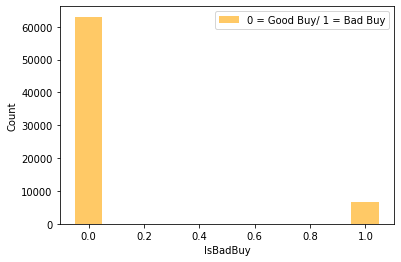

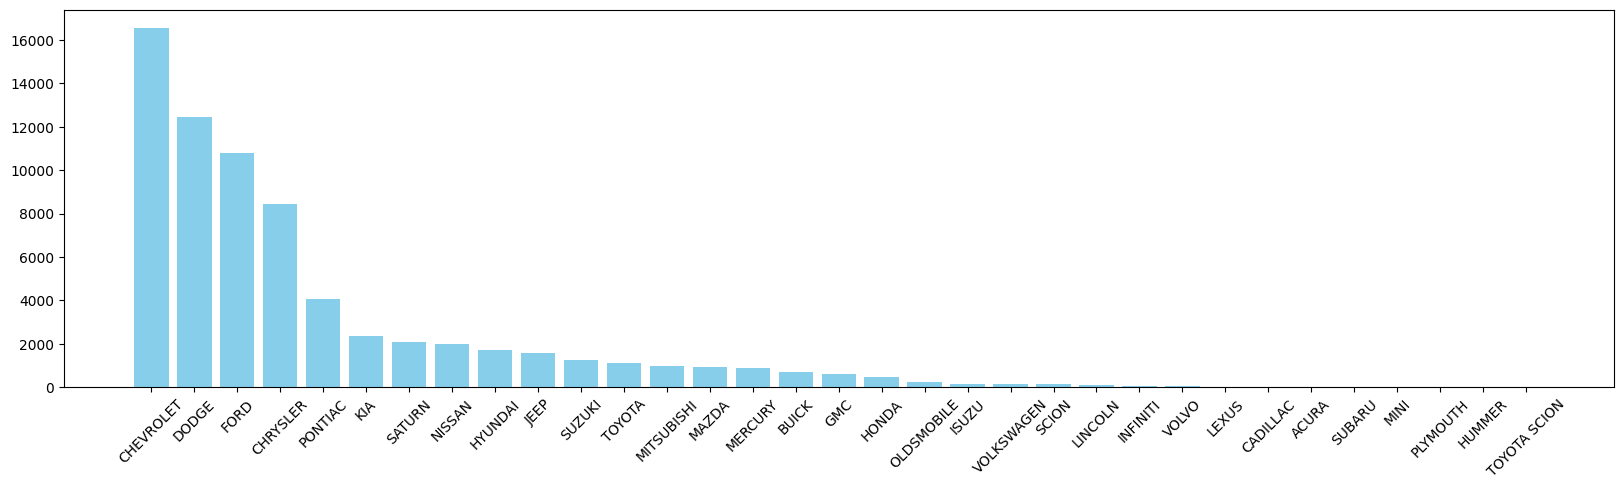

In [18]:
#14 Create  Bar chart plot of these features: 'IsBadBuy', 'Make'
badbuy = df.IsBadBuy.value_counts().to_dict()
keys_badbuy = badbuy.keys()
values_badbuy = badbuy.values()
plt.bar(keys_badbuy,values_badbuy, width=0.1, color='orange', alpha=0.6)
plt.xlabel('IsBadBuy')
plt.ylabel('Count')
plt.legend(["0 = Good Buy/ 1 = Bad Buy"], bbox_to_anchor=(1,1,0,0))
plt.show()

make_dict = df.Make.value_counts().to_dict()
keys_make = make_dict.keys()
values_make = make_dict.values()
fig = plt.figure(dpi=100, figsize=(20,5))
plt.bar(keys_make, values_make, color = 'skyblue')
plt.xticks(rotation=45)
plt.show()

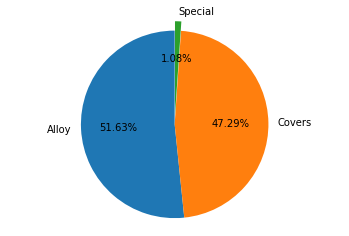

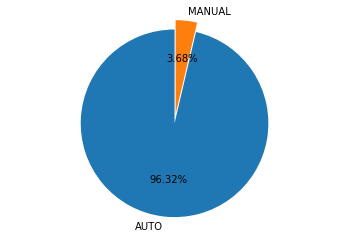

In [19]:
#15 Create Pie chart of these features: 'WheelType', 'Transmission'.
wheel_data = df.WheelType.value_counts().to_dict()
wheel_key = wheel_data.keys()
wheel_value = wheel_data.values()
explode = (0,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie (wheel_value, explode = explode, labels = wheel_key, autopct=lambda p:f'{p:.2f}%', startangle=90)
ax1.axis('equal')
plt.show()

transmission = df.Transmission.value_counts().to_dict()
trans_key = transmission.keys()
trans_value = transmission.values()
explode = (0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie (trans_value, explode = explode, labels = trans_key, autopct=lambda p:f'{p:.2f}%', startangle=90)
ax1.axis('equal')
plt.show()

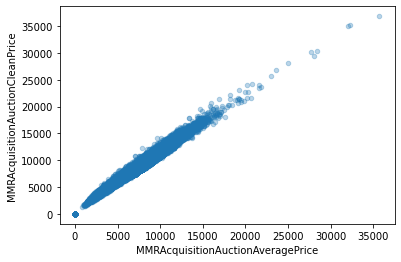

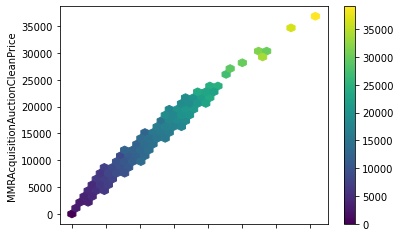

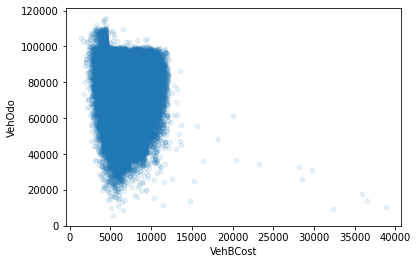

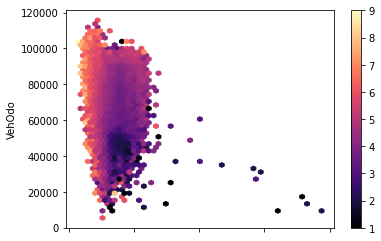

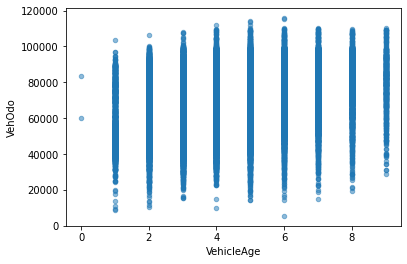

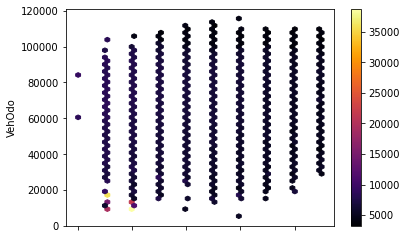

In [20]:
#16 Create a scatter plot and hexbins plot of:
#('MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice')
df.plot(kind="scatter", x="MMRAcquisitionAuctionAveragePrice", y = "MMRAcquisitionAuctionCleanPrice", alpha = 0.3)
df.plot(kind="hexbin", x="MMRAcquisitionAuctionAveragePrice", C= "MMRAcquisitionRetailAveragePrice", y = "MMRAcquisitionAuctionCleanPrice", gridsize = 30, cmap='viridis')

#16 Create a scatter plot and hexbins plot of ('VehBCost', 'VehOdo')
df.plot(kind="scatter", x="VehBCost", y = "VehOdo", alpha = 0.1)
df.plot(kind="hexbin", x="VehBCost", C= "VehicleAge", y = "VehOdo", gridsize = 50, cmap='magma')

#16 Create a scatter plot and hexbins plot of ('VehicleAge, VehOdo')
df.plot(kind="scatter", x="VehicleAge", y = "VehOdo", alpha = 0.5)
df.plot(kind="hexbin", x="VehicleAge", C= "VehBCost", y = "VehOdo", gridsize = 50, cmap='inferno')

In [21]:
#18 Perform Feature encoding for feature ‘Color’, ‘WheelType’.
df_new = pd.get_dummies(df['Color'])
df = pd.concat([df,df_new], axis = 1)

df['WheelType'] = df['WheelType'].astype('category')
df['WheelType'] = df['WheelType'].cat.codes
df

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,VehBCost,new_VehOdo,BEIGE,BLACK,BLUE,BROWN,GOLD,GREEN,GREY,MAROON,NOT AVAIL,ORANGE,OTHER,PURPLE,RED,SILVER,WHITE,YELLOW
0,0,ADESA,3,MAZDA,RED,AUTO,0,89046,OTHER ASIAN,MEDIUM,OTHER,8155,9829,11636,7100.0,90000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,ADESA,5,DODGE,WHITE,AUTO,0,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854,8383,10897,7600.0,90000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,ADESA,4,DODGE,MAROON,AUTO,1,73807,AMERICAN,MEDIUM,CHRYSLER,3202,4760,6943,4900.0,70000.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,ADESA,5,DODGE,SILVER,AUTO,0,65617,AMERICAN,COMPACT,CHRYSLER,1893,2675,4658,4100.0,70000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,ADESA,4,FORD,SILVER,MANUAL,1,69367,AMERICAN,COMPACT,FORD,3913,5054,7723,4000.0,70000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72977,0,ADESA,3,KIA,GOLD,AUTO,0,65399,OTHER ASIAN,MEDIUM SUV,OTHER,7843,9171,8970,7900.0,70000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
72978,1,ADESA,8,MERCURY,BLACK,AUTO,0,45234,AMERICAN,MEDIUM,FORD,1996,2993,2656,4200.0,50000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72980,0,ADESA,4,JEEP,SILVER,AUTO,0,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545,9959,9729,8200.0,90000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
72981,0,ADESA,3,CHEVROLET,WHITE,AUTO,0,79554,AMERICAN,LARGE,GM,6420,7604,7434,7000.0,80000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
#19 Create the correlation matrix of continuous features of the dataset.
df_to_draw_corr = df.filter(items=['VehicleAge','VehOdo','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice',
                     'MMRAcquisitionRetailAveragePrice', 'VehBCost'])
df_to_draw_corr.corr()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,VehBCost
VehicleAge,1.000000,0.317389,-0.565265,-0.517965,-0.459992,-0.311026
VehOdo,0.317389,1.000000,-0.013240,0.028514,0.035813,-0.057782
MMRAcquisitionAuctionAveragePrice,-0.565265,-0.013240,1.000000,0.990289,0.910100,0.788810
MMRAcquisitionAuctionCleanPrice,-0.517965,0.028514,0.990289,1.000000,0.902465,0.780419
MMRAcquisitionRetailAveragePrice,-0.459992,0.035813,0.910100,0.902465,1.000000,0.745327
VehBCost,-0.311026,-0.057782,0.788810,0.780419,0.745327,1.000000


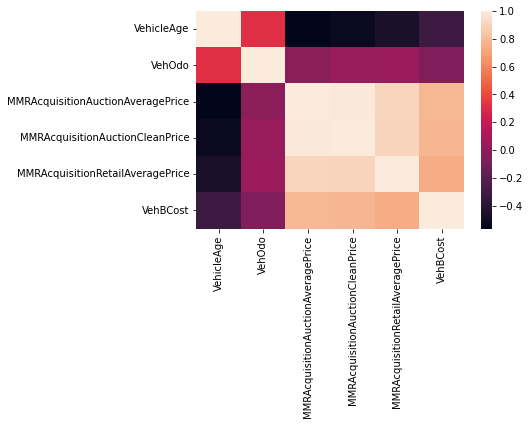

In [23]:
#20 Create the Heatmap plot of the correlation matrix of continuous features.
sns_plot = sns.heatmap(df_to_draw_corr.corr())
sns_plot.figure.savefig('filename.png', dpi = 400)